# Import Libraries

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow import keras

In [2]:
# Function to preprocess images
def preprocess_image(image):
    # Resize image to a fixed size
    resized_image = cv2.resize(image, (224, 224))
    # Normalize pixel values (assuming images are in the range [0, 255])
    normalized_image = resized_image / 255.0
    return normalized_image

# Data Pre-processing

## Import Data and separate into Images and Labels

In [3]:
# Directory containing your images
directory = 'C:/Users/Duhyeon/Desktop/UBC/UBC Research/Work_Learn/SPAs Data/Experimental Data/Pictures/Real Trajectory Pictures'

# List all files in the directory
files = os.listdir(directory)

# Lists to store images and labels
images = []
labels = []

# Iterate over each file
for file in files:
    if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
        file_path = os.path.join(directory, file)
        # Read the image
        image = cv2.imread(file_path)
        
        # convert the input image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # apply thresholding to convert grayscale to binary image
        ret,thresh = cv2.threshold(gray,224,224,0)
        
        # Preprocess the image
        preprocessed_image = preprocess_image(thresh)
        
        # Add the preprocessed image to the list of images
        images.append(preprocessed_image)
        # Assuming your file names contain the class label (e.g., 'cat', 'dog')
        label = file.split('.')[0]  # Extract label from file name
        labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

In [4]:
np.shape(images)

(102, 224, 224)

## Label Encoding

In [5]:
# Label Encoding
from sklearn import preprocessing
from keras.utils import to_categorical

le = preprocessing.LabelEncoder()

# Fit the encoder to the categories and transform (encode) them
encoded_labels = le.fit_transform(labels)

# Now to decode, use inverse_transform
decoded_labels = le.inverse_transform(encoded_labels)

# Print encoded and decoded results for comparison
print("Encoded Labels:", encoded_labels)
print("Decoded Labels:", decoded_labels)

Encoded Labels: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101]
Decoded Labels: ['DS10DS10_0_1' 'DS10DS10_0_2' 'DS10DS10_0_3' 'DS10DS10_0_6'
 'DS10DS10_1_2' 'DS10DS10_1_3' 'DS10DS10_1_6' 'DS10DS10_2_3'
 'DS10DS10_2_6' 'DS10DS10_3_6' 'DS10DS30_1_1' 'DS10DS30_1_2'
 'DS10DS30_1_3' 'DS10DS30_1_6' 'DS10DS30_2_1' 'DS10DS30_2_2'
 'DS10DS30_2_3' 'DS10DS30_2_6' 'DS10DS30_3_1' 'DS10DS30_3_2'
 'DS10DS30_3_3' 'DS10DS30_3_6' 'DS10DS30_6_1' 'DS10DS30_6_2'
 'DS10DS30_6_3' 'DS10DS30_6_6' 'DS10E30_1_1' 'DS10E30_1_2' 'DS10E30_1_3'
 'DS10E30_2_1' 'DS10E30_2_2' 'DS10E30_2_3' 'DS10E30_2_6' 'DS10E30_3_1'
 'DS10E30_3_2' 'DS10E30_3_3' 'DS10E30_3_6' 

In [6]:
# Label encoding, Using it for Calculating R2, MSE, RMSE, MAE

le.fit(labels)
target_encoded = to_categorical(le.transform(labels), 102) # Number has to be changed
np.shape(target_encoded)

(102, 102)

In [7]:
target_encoded

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

## Split Dataset into Train and Test Sets

In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, target_encoded, test_size=0.2, random_state=42)

# Create CNN Model

In [9]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('patience=6, restore_best_weights=True')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True)

In [10]:
# Define CNN model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(102, activation='softmax') # Number has to be changed
])

In [11]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# Train the model
history = model.fit(images, encoded_labels, epochs=50,
                    validation_data=(images, encoded_labels),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
4/4 [==============================] - ETA: 0s - loss: 5.3950 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 5s 1s/step - loss: 5.3950 - accuracy: 0.0000e+00 - val_loss: 4.6267 - val_accuracy: 0.0098
Epoch 2/50
4/4 [==============================] - ETA: 0s - loss: 4.6242 - accuracy: 0.0098

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 4.6242 - accuracy: 0.0098 - val_loss: 4.6237 - val_accuracy: 0.0098
Epoch 3/50
4/4 [==============================] - ETA: 0s - loss: 4.6296 - accuracy: 0.0098

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 4.6296 - accuracy: 0.0098 - val_loss: 4.6219 - val_accuracy: 0.0098
Epoch 4/50
4/4 [==============================] - ETA: 0s - loss: 4.6355 - accuracy: 0.0196

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 4.6355 - accuracy: 0.0196 - val_loss: 4.6234 - val_accuracy: 0.0098
Epoch 5/50
4/4 [==============================] - ETA: 0s - loss: 4.6450 - accuracy: 0.0196  

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 4.6450 - accuracy: 0.0196 - val_loss: 4.6103 - val_accuracy: 0.0392
Epoch 6/50
4/4 [==============================] - ETA: 0s - loss: 4.6044 - accuracy: 0.0098

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 4.6044 - accuracy: 0.0098 - val_loss: 4.5870 - val_accuracy: 0.0196
Epoch 7/50
4/4 [==============================] - ETA: 0s - loss: 4.6050 - accuracy: 0.0098  

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 4.6050 - accuracy: 0.0098 - val_loss: 4.5482 - val_accuracy: 0.0392
Epoch 8/50
4/4 [==============================] - ETA: 0s - loss: 4.5484 - accuracy: 0.0490

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 4.5484 - accuracy: 0.0490 - val_loss: 4.4572 - val_accuracy: 0.0686
Epoch 9/50
4/4 [==============================] - ETA: 0s - loss: 4.4830 - accuracy: 0.0686

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 4.4830 - accuracy: 0.0686 - val_loss: 4.3019 - val_accuracy: 0.1863
Epoch 10/50
4/4 [==============================] - ETA: 0s - loss: 4.3080 - accuracy: 0.0980

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 4.3080 - accuracy: 0.0980 - val_loss: 4.0277 - val_accuracy: 0.1765
Epoch 11/50
4/4 [==============================] - ETA: 0s - loss: 4.0333 - accuracy: 0.1078

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 4.0333 - accuracy: 0.1078 - val_loss: 3.4750 - val_accuracy: 0.2157
Epoch 12/50
4/4 [==============================] - ETA: 0s - loss: 3.6556 - accuracy: 0.1176

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 8s 3s/step - loss: 3.6556 - accuracy: 0.1176 - val_loss: 2.9930 - val_accuracy: 0.2941
Epoch 13/50
4/4 [==============================] - ETA: 0s - loss: 3.3033 - accuracy: 0.2157

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 8s 2s/step - loss: 3.3033 - accuracy: 0.2157 - val_loss: 2.6688 - val_accuracy: 0.3039
Epoch 14/50
4/4 [==============================] - ETA: 0s - loss: 3.1008 - accuracy: 0.2451

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 8s 3s/step - loss: 3.1008 - accuracy: 0.2451 - val_loss: 2.3810 - val_accuracy: 0.3627
Epoch 15/50
4/4 [==============================] - ETA: 0s - loss: 2.9121 - accuracy: 0.3039

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 11s 3s/step - loss: 2.9121 - accuracy: 0.3039 - val_loss: 2.0534 - val_accuracy: 0.4412
Epoch 16/50
4/4 [==============================] - ETA: 0s - loss: 2.4480 - accuracy: 0.3235

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 11s 3s/step - loss: 2.4480 - accuracy: 0.3235 - val_loss: 1.7754 - val_accuracy: 0.5196
Epoch 17/50
4/4 [==============================] - ETA: 0s - loss: 2.3194 - accuracy: 0.3627

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 2.3194 - accuracy: 0.3627 - val_loss: 1.5888 - val_accuracy: 0.5392
Epoch 18/50
4/4 [==============================] - ETA: 0s - loss: 2.2981 - accuracy: 0.3235

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 2.2981 - accuracy: 0.3235 - val_loss: 1.5003 - val_accuracy: 0.5686
Epoch 19/50
4/4 [==============================] - ETA: 0s - loss: 1.9188 - accuracy: 0.4412

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 1.9188 - accuracy: 0.4412 - val_loss: 1.3419 - val_accuracy: 0.5882
Epoch 20/50
4/4 [==============================] - ETA: 0s - loss: 2.0280 - accuracy: 0.4314

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 2.0280 - accuracy: 0.4314 - val_loss: 1.0825 - val_accuracy: 0.6667
Epoch 21/50
4/4 [==============================] - ETA: 0s - loss: 1.8770 - accuracy: 0.4510

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 1.8770 - accuracy: 0.4510 - val_loss: 1.0116 - val_accuracy: 0.7157
Epoch 22/50
4/4 [==============================] - ETA: 0s - loss: 1.5409 - accuracy: 0.5196

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 1.5409 - accuracy: 0.5196 - val_loss: 0.9670 - val_accuracy: 0.8039
Epoch 23/50
4/4 [==============================] - ETA: 0s - loss: 1.5655 - accuracy: 0.4706

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 1.5655 - accuracy: 0.4706 - val_loss: 0.7840 - val_accuracy: 0.8235
Epoch 24/50
4/4 [==============================] - ETA: 0s - loss: 1.4636 - accuracy: 0.5980

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 1.4636 - accuracy: 0.5980 - val_loss: 0.6785 - val_accuracy: 0.8137
Epoch 25/50
4/4 [==============================] - ETA: 0s - loss: 1.2281 - accuracy: 0.5784

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 1.2281 - accuracy: 0.5784 - val_loss: 0.6396 - val_accuracy: 0.8431
Epoch 26/50
4/4 [==============================] - ETA: 0s - loss: 1.2143 - accuracy: 0.5490

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 1.2143 - accuracy: 0.5490 - val_loss: 0.6454 - val_accuracy: 0.8333
Epoch 27/50
4/4 [==============================] - ETA: 0s - loss: 1.1925 - accuracy: 0.5882

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 1.1925 - accuracy: 0.5882 - val_loss: 0.5515 - val_accuracy: 0.8529
Epoch 28/50
4/4 [==============================] - ETA: 0s - loss: 1.0970 - accuracy: 0.6863

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 1.0970 - accuracy: 0.6863 - val_loss: 0.4290 - val_accuracy: 0.8824
Epoch 29/50
4/4 [==============================] - ETA: 0s - loss: 0.9794 - accuracy: 0.6961

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 0.9794 - accuracy: 0.6961 - val_loss: 0.3281 - val_accuracy: 0.9314
Epoch 30/50
4/4 [==============================] - ETA: 0s - loss: 0.9596 - accuracy: 0.7059

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 0.9596 - accuracy: 0.7059 - val_loss: 0.2945 - val_accuracy: 0.9510
Epoch 31/50
4/4 [==============================] - ETA: 0s - loss: 0.6246 - accuracy: 0.8235

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 0.6246 - accuracy: 0.8235 - val_loss: 0.2953 - val_accuracy: 0.9314
Epoch 32/50
4/4 [==============================] - ETA: 0s - loss: 0.6658 - accuracy: 0.7843

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 0.6658 - accuracy: 0.7843 - val_loss: 0.2608 - val_accuracy: 0.9118
Epoch 33/50
4/4 [==============================] - ETA: 0s - loss: 0.6371 - accuracy: 0.8039

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 0.6371 - accuracy: 0.8039 - val_loss: 0.2075 - val_accuracy: 0.9608
Epoch 34/50
4/4 [==============================] - ETA: 0s - loss: 0.5711 - accuracy: 0.7843

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 0.5711 - accuracy: 0.7843 - val_loss: 0.1827 - val_accuracy: 0.9608
Epoch 35/50
4/4 [==============================] - ETA: 0s - loss: 0.4774 - accuracy: 0.8922

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 0.4774 - accuracy: 0.8922 - val_loss: 0.1562 - val_accuracy: 0.9510
Epoch 36/50
4/4 [==============================] - ETA: 0s - loss: 0.4172 - accuracy: 0.8627

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 0.4172 - accuracy: 0.8627 - val_loss: 0.1226 - val_accuracy: 0.9706
Epoch 37/50
4/4 [==============================] - ETA: 0s - loss: 0.4933 - accuracy: 0.8137

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 0.4933 - accuracy: 0.8137 - val_loss: 0.0963 - val_accuracy: 0.9804
Epoch 38/50
4/4 [==============================] - ETA: 0s - loss: 0.4614 - accuracy: 0.8431

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 0.4614 - accuracy: 0.8431 - val_loss: 0.0855 - val_accuracy: 0.9706
Epoch 39/50
4/4 [==============================] - ETA: 0s - loss: 0.4472 - accuracy: 0.8235

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 0.4472 - accuracy: 0.8235 - val_loss: 0.0735 - val_accuracy: 0.9706
Epoch 40/50
4/4 [==============================] - ETA: 0s - loss: 0.4097 - accuracy: 0.8725

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 0.4097 - accuracy: 0.8725 - val_loss: 0.0736 - val_accuracy: 0.9902
Epoch 41/50
4/4 [==============================] - ETA: 0s - loss: 0.4639 - accuracy: 0.8627

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 991ms/step - loss: 0.4639 - accuracy: 0.8627 - val_loss: 0.0704 - val_accuracy: 0.9804
Epoch 42/50
4/4 [==============================] - ETA: 0s - loss: 0.3019 - accuracy: 0.8824

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 0.3019 - accuracy: 0.8824 - val_loss: 0.0691 - val_accuracy: 0.9902
Epoch 43/50
4/4 [==============================] - ETA: 0s - loss: 0.4785 - accuracy: 0.8529

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 0.4785 - accuracy: 0.8529 - val_loss: 0.0704 - val_accuracy: 0.9902
Epoch 44/50
4/4 [==============================] - ETA: 0s - loss: 0.2822 - accuracy: 0.9020

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 0.2822 - accuracy: 0.9020 - val_loss: 0.0655 - val_accuracy: 0.9902
Epoch 45/50
4/4 [==============================] - ETA: 0s - loss: 0.1804 - accuracy: 0.9510

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 0.1804 - accuracy: 0.9510 - val_loss: 0.0466 - val_accuracy: 0.9902
Epoch 46/50
4/4 [==============================] - ETA: 0s - loss: 0.2190 - accuracy: 0.9412

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 0.2190 - accuracy: 0.9412 - val_loss: 0.0332 - val_accuracy: 0.9902
Epoch 47/50
4/4 [==============================] - ETA: 0s - loss: 0.2297 - accuracy: 0.9510

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 988ms/step - loss: 0.2297 - accuracy: 0.9510 - val_loss: 0.0367 - val_accuracy: 0.9902
Epoch 48/50
4/4 [==============================] - ETA: 0s - loss: 0.2190 - accuracy: 0.9314

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 0.2190 - accuracy: 0.9314 - val_loss: 0.0367 - val_accuracy: 0.9902
Epoch 49/50
4/4 [==============================] - ETA: 0s - loss: 0.1458 - accuracy: 0.9706

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 0.1458 - accuracy: 0.9706 - val_loss: 0.0226 - val_accuracy: 1.0000
Epoch 50/50
4/4 [==============================] - ETA: 0s - loss: 0.1327 - accuracy: 0.9706

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 0.1327 - accuracy: 0.9706 - val_loss: 0.0229 - val_accuracy: 1.0000


# Evaluating the model

In [13]:
# Evaluating the model
model.evaluate(images, encoded_labels)

4/4 [==============================] - 0s 103ms/step - loss: 0.0229 - accuracy: 1.0000


[0.022854113951325417, 1.0]

In [14]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


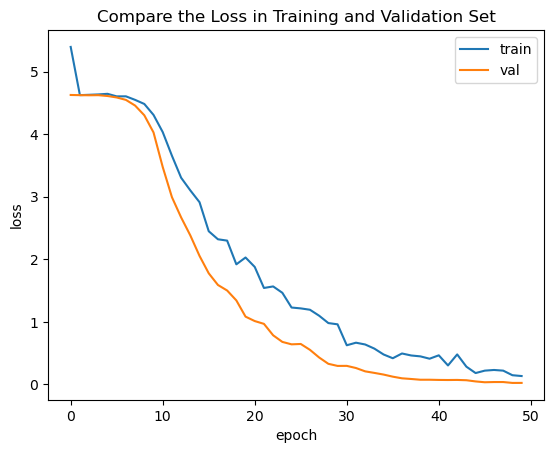

In [15]:
# Plot Loss of both training and validation set
import matplotlib.pyplot as plt

plt.title('Compare the Loss in Training and Validation Set')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

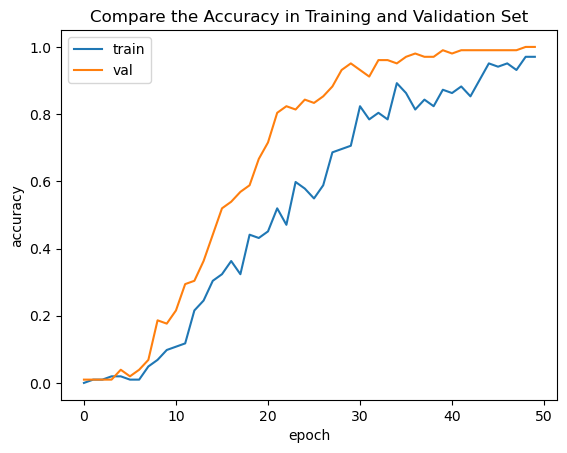

In [16]:
# Plot Loss of both training and validation set

plt.title('Compare the Accuracy in Training and Validation Set')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()

## Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions
predictions = model.predict(images)

# Convert predictions to labels
predicted_labels = np.argmax(predictions, axis=1)
# Convert target labels back to original labels
predicted_labels = le.inverse_transform(predicted_labels)

# Get true labels
true_labels = decoded_labels

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Normalize the confusion matrix to show values between 0 and 1
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Print normalized confusion matrix
print(cm_normalized)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decoded_labels)
fig, ax = plt.subplots(figsize=(102,102))
disp.plot(ax=ax, cmap='viridis', values_format='.2f', colorbar=False) # Disable the automatic color bar
ax.set_title('Confusion Matrix for Experiment', fontsize = 250, fontweight = 'bold')  # Set the title font
ax.set_xlabel('Predicted Configurations', fontsize = 150, fontweight = 'bold')  # Set the x-axis label
ax.set_ylabel('True Configurations', fontsize = 150, fontweight = 'bold')       # Set the y-axis label

# Remove the text from the matrix cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.texts[i * cm.shape[1] + j].set_visible(False)

# Hide tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

# Add a single color bar
cbar = fig.colorbar(disp.im_, ax=ax)
cbar.ax.set_ylabel('Normalized Value', rotation=-90, va="bottom", fontsize=150, fontweight = 'bold')  # Increase font size of the color bar label
cbar.ax.tick_params(labelsize=40)  # Increase font size of the color bar ticks

plt.show()

4/4 [==============================] - 1s 120ms/step
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


## R-sqaured value, MSE, RMSE, MAE

In [18]:
# prompt: R-sqaured value, MSE, RMSE, MAE

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Predict the trainig & validation data
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_test)

# Calculate the R-squared value
r2_train = r2_score(y_train, y_pred_train)
r2_val = r2_score(y_test, y_pred_val)

# Calculate the mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_val = mean_squared_error(y_test, y_pred_val)

# Calculate the root mean squared error
rmse_train = np.sqrt(mse_train)
rmse_val = np.sqrt(mse_val)

# Calculate the mean absolute error
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_val = mean_absolute_error(y_test, y_pred_val)

# Print the results
print("R-squared for Train Model:", r2_train)
print("R-squared for Validation Model:", r2_val)
print()

print("MSE for Train Model:", mse_train)
print("MSE for Validation Model:", mse_val)
print()

print("RMSE for Train Model:", rmse_train)
print("RMSE for Validation Model:", rmse_val)
print()

print("MAE for Train Model:", mae_train)
print("MAE for Validation Model:", mae_val)

1/1 [==============================] - 0s 104ms/step
R-squared for Train Model: 0.7881365487146209
R-squared for Validation Model: 0.2053272877484248

MSE for Train Model: 8.6839034e-05
MSE for Validation Model: 4.5890763e-05

RMSE for Train Model: 0.009318747
RMSE for Validation Model: 0.0067742723

MAE for Train Model: 0.00040555815
MAE for Validation Model: 0.0003563179


## Model Summary and Structure Diagram

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

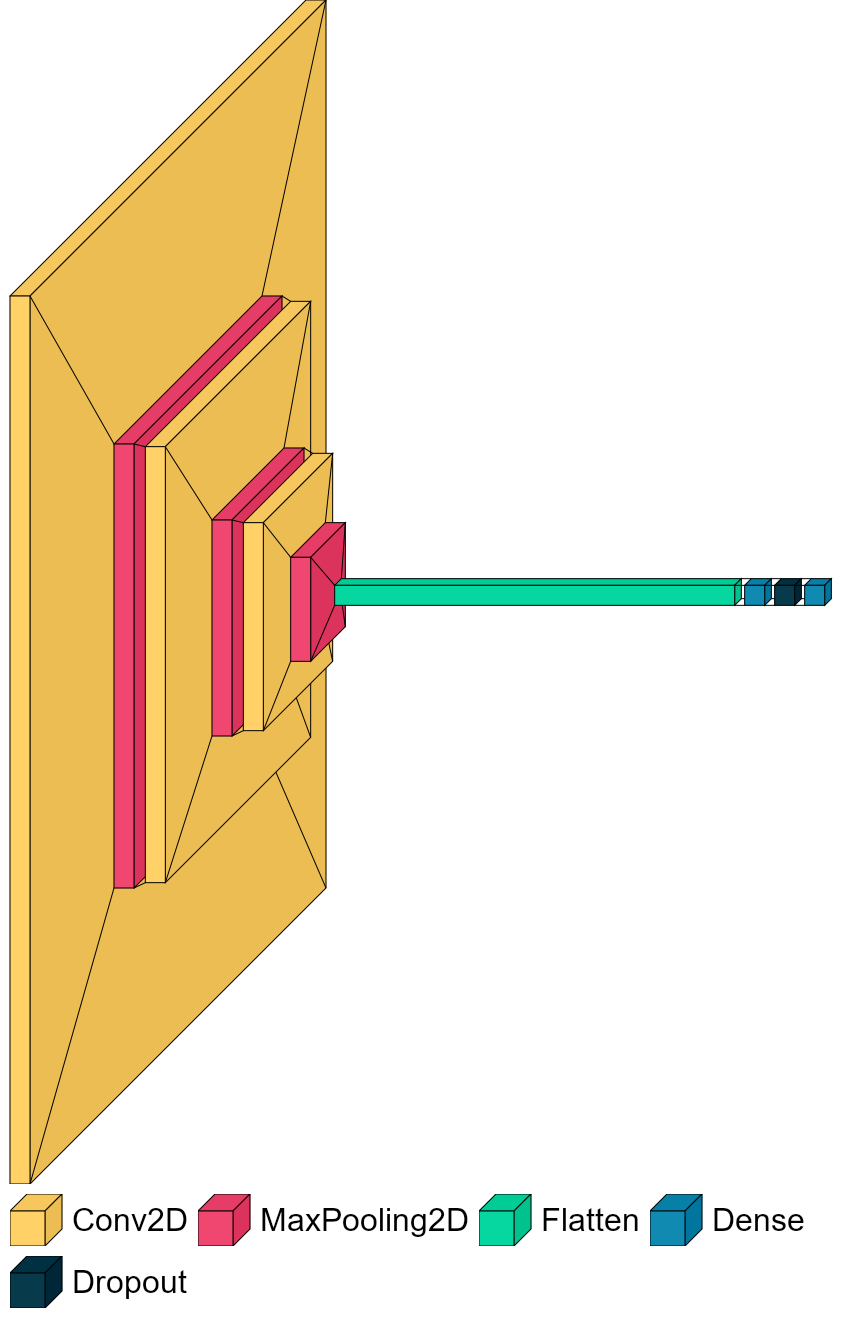

In [20]:
import visualkeras
from PIL import ImageFont

font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model, legend=True, font=font)  # font is optional!

## With Equation Graphs

In [21]:
# Directory containing your images
directory = 'C:/Users/Duhyeon/Desktop/UBC/UBC Research/Work_Learn/SPAs Data/Experimental Data/Pictures/Equation Trajectory Pictures'

# List all files in the directory
files = os.listdir(directory)

# Lists to store images and labels
images = []
labels = []

# Iterate over each file
for file in files:
    if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
        file_path = os.path.join(directory, file)
        # Read and preprocess the image
        image = cv2.imread(file_path)
        # convert the input image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # apply thresholding to convert grayscale to binary image
        ret,thresh = cv2.threshold(gray,224,224,0)
        
        # Preprocess the image
        preprocessed_image = preprocess_image(thresh)
        
        # Add the preprocessed image to the list of images
        images.append(preprocessed_image)
        # Assuming your file names contain the class label (e.g., 'cat', 'dog')
        label = file.split('.')[0]  # Extract label from file name
        labels.append(label)

# Convert lists to numpy arrays
images2Eval = np.array(images)
labels2Eval = np.array(labels)

In [22]:
np.shape(images2Eval)

(102, 224, 224)

In [23]:
# Prediction
pred_eval = model.predict(images2Eval)

# Decoding Predictions

maxarg2val_list = []
for i in range(len(pred_eval)):
    maxarg2val = np.argmax(pred_eval[i])
    maxarg2val_list.append(maxarg2val)

print(maxarg2val_list)
decoded_pred2Eval = le.inverse_transform(maxarg2val_list)
print(decoded_pred2Eval)

4/4 [==============================] - 0s 106ms/step
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 24, 11, 12, 13, 14, 15, 16, 101, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 26, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 88, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 87, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 64, 3, 3, 94, 95, 96, 97, 4, 99, 100, 38]
['DS10DS10_0_1' 'DS10DS10_0_2' 'DS10DS10_0_3' 'DS10DS10_0_6'
 'DS10DS10_1_2' 'DS10DS10_1_3' 'DS10DS10_1_6' 'DS10DS10_2_3'
 'DS10DS10_2_6' 'DS10DS10_3_6' 'DS10DS30_6_3' 'DS10DS30_1_2'
 'DS10DS30_1_3' 'DS10DS30_1_6' 'DS10DS30_2_1' 'DS10DS30_2_2'
 'DS10DS30_2_3' 'E30E30_3_6' 'DS10DS30_3_1' 'DS10DS30_3_2' 'DS10DS30_3_3'
 'DS10DS30_3_6' 'DS10DS30_6_1' 'DS10DS30_6_2' 'DS10DS30_6_3'
 'DS10DS30_6_6' 'DS10E30_1_1' 'DS10E30_1_2' 'DS10E30_1_3' 'DS10E30_2_1'
 'DS10E30_2_2' 'DS10E30_2_3' 'DS10E30_1_1' 'DS10E30_3_1' 'DS10E30_3_2'
 'DS10E30_3_3' 'DS10E30_3_6

In [24]:
# Calculate the number of correct predictions
correct_predictions = sum(labels2Eval == decoded_pred2Eval)

# Calculate the total number of predictions
total_predictions = len(labels2Eval)

# Calculate the percentage of correct predictions
accuracy_percent = (correct_predictions / total_predictions) * 100

# Calculate the percentage of incorrect predictions
incorrect_percent = 100 - accuracy_percent

# Print the results
print("Accuracy: {}%".format(accuracy_percent))
print("Incorrect: {}%".format(incorrect_percent))

Accuracy: 90.19607843137256%
Incorrect: 9.803921568627445%


## With 4 Arbitrary (Leaning) Trajactories

In [25]:
# Directory containing your images
directory = 'C:/Users/Duhyeon/Desktop/UBC/UBC Research/Work_Learn/SPAs Data/Experimental Data/Pictures/Arbitrary Trajectory Pictures'

# List all files in the directory
files = os.listdir(directory)

# Lists to store images and labels
images = []
labels = []

# Iterate over each file
for file in files:
    if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
        file_path = os.path.join(directory, file)
        # Read the image
        image = cv2.imread(file_path)
        
        # convert the input image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # apply thresholding to convert grayscale to binary image
        ret,thresh = cv2.threshold(gray,224,224,0)
        
        # Preprocess the image
        preprocessed_image = preprocess_image(thresh)
        
        # Add the preprocessed image to the list of images
        images.append(preprocessed_image)
        
        label = file.split('.')[0]  # Extract label from file name
        labels.append(label)

# Convert lists to numpy arrays
images_rnd = np.array(images)
labels_rnd = np.array(labels)

In [26]:
labels_rnd

array(['DS10DS30_6_1vsDS30DS30_0_3', 'DS20DS20_0_1vsDS30DS30_0_2',
       'DS30DS30_0_1vsDS20DS20_0_1', 'DS30DS30_0_2vsDS10DS30_6_1'],
      dtype='<U26')

In [27]:
# Prediction should be leaning on the left trajectory
labels_rnd[0] = 'DS10DS30_6_1'
labels_rnd[1] = 'DS20DS20_0_1'
labels_rnd[2] = 'DS30DS30_0_1'
labels_rnd[3] = 'DS30DS30_0_2'

In [28]:
labels_rnd

array(['DS10DS30_6_1', 'DS20DS20_0_1', 'DS30DS30_0_1', 'DS30DS30_0_2'],
      dtype='<U26')

In [29]:
# Prediction
pred_rnd = model.predict(images_rnd)

# Decoding Predictions

maxarg2val_list = []
for i in range(len(pred_rnd)):
    maxarg2val = np.argmax(pred_rnd[i])
    maxarg2val_list.append(maxarg2val)

print(maxarg2val_list)
decoded_pred_rnd = le.inverse_transform(maxarg2val_list)
print(decoded_pred_rnd)

1/1 [==============================] - 0s 53ms/step
[22, 40, 40, 66]
['DS10DS30_6_1' 'DS20DS20_0_1' 'DS20DS20_0_1' 'DS30DS30_0_2']


In [30]:
pred_rnd

array([[1.98602879e-06, 5.54493954e-06, 2.58311189e-07, 4.64921124e-09,
        5.13369081e-08, 1.96679188e-08, 4.24396385e-09, 1.77277859e-09,
        1.31595243e-06, 5.36722951e-08, 3.16994124e-06, 5.55214041e-10,
        6.37652477e-07, 3.45459694e-06, 8.35168557e-09, 3.22148821e-06,
        1.63587865e-09, 5.02760944e-09, 6.07689330e-08, 8.56344116e-07,
        7.04883234e-07, 2.21782326e-09, 9.42202508e-01, 2.42906367e-07,
        5.97276042e-08, 1.38715791e-06, 1.24059750e-06, 4.77705839e-07,
        1.79811229e-06, 5.58945999e-07, 1.72783643e-06, 1.11792922e-07,
        9.53029158e-08, 3.03745492e-06, 1.87265769e-07, 3.64721786e-09,
        2.98138929e-07, 1.32766875e-09, 1.04889963e-08, 8.00160763e-07,
        8.75168212e-07, 7.46252408e-05, 8.79907844e-08, 2.19190213e-08,
        2.49872301e-08, 1.31445859e-08, 4.38944348e-09, 9.48899959e-10,
        1.76488815e-08, 9.05638853e-09, 2.29959383e-07, 1.35668063e-08,
        6.01167756e-08, 1.10528811e-06, 1.14168436e-07, 2.598517

In [31]:
# Function to find top 5 values and their indices in each row
def get_top_5_indices_and_values(array):
    top_5_indices = np.argsort(array)[-5:][::-1]
    top_5_decoded = le.inverse_transform(top_5_indices)
    top_5_values = array[top_5_indices]*100
    
    return top_5_indices, top_5_decoded, top_5_values, 

# Iterate through each row in the array and find top 5 indices and values
for i, row in enumerate(pred_rnd):
    indices, configurations, values = get_top_5_indices_and_values(row)
    print(f"Row {i}:")
    print("Top 5 indices:", indices)
    print("Top 5 configurations: ", configurations)
    print("Top 5 values:", values)
    print()

Row 0:
Top 5 indices: [22 67 57 41 66]
Top 5 configurations:  ['DS10DS30_6_1' 'DS30DS30_0_3' 'DS20E30_3_1' 'DS20DS20_0_2' 'DS30DS30_0_2']
Top 5 values: [9.4220253e+01 5.7333922e+00 2.5535500e-02 7.4625239e-03 4.6021910e-03]

Row 1:
Top 5 indices: [40 66 98 33 39]
Top 5 configurations:  ['DS20DS20_0_1' 'DS30DS30_0_2' 'E30E30_1_6' 'DS10E30_3_1' 'DS10E30_6_6']
Top 5 values: [9.9682129e+01 3.1245992e-01 2.5859114e-03 4.2511828e-04 3.2613298e-04]

Row 2:
Top 5 indices: [40 98 71 93 97]
Top 5 configurations:  ['DS20DS20_0_1' 'E30E30_1_6' 'DS30DS30_1_6' 'E30E30_0_2' 'E30E30_1_3']
Top 5 values: [9.9995590e+01 1.2872514e-03 5.2518246e-04 3.6722294e-04 2.0177156e-04]

Row 3:
Top 5 indices: [66 33 68 41 22]
Top 5 configurations:  ['DS30DS30_0_2' 'DS10E30_3_1' 'DS30DS30_0_6' 'DS20DS20_0_2' 'DS10DS30_6_1']
Top 5 values: [9.9997627e+01 8.5277687e-04 3.6140467e-04 3.3708889e-04 2.6109768e-04]



In [32]:
# Calculate the number of correct predictions
correct_predictions = sum(labels_rnd == decoded_pred_rnd)

# Calculate the total number of predictions
total_predictions = len(labels_rnd)

# Calculate the percentage of correct predictions
accuracy_percent = (correct_predictions / total_predictions) * 100

# Calculate the percentage of incorrect predictions
incorrect_percent = 100 - accuracy_percent

# Print the results
print("Accuracy: {}%".format(accuracy_percent))
print("Incorrect: {}%".format(incorrect_percent))

Accuracy: 75.0%
Incorrect: 25.0%


# Validating with Increasement Dataset (0%, 1%, 2%, and 5%)

In [33]:
directory = 'C:/Users/Duhyeon/Desktop/UBC/UBC Research/Work_Learn/SPAs Data/Experimental Data/Pictures/Increasement Picture/0%'

# List all files in the directory
files = os.listdir(directory)

# Lists to store images and labels
images_0 = []
labels_0 = []

# Iterate over each file
for file in files:
    if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
        file_path = os.path.join(directory, file)
        # Read the image
        image = cv2.imread(file_path)
        
        # convert the input image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # apply thresholding to convert grayscale to binary image
        ret,thresh = cv2.threshold(gray,224,224,0)
        
        # Preprocess the image
        preprocessed_image = preprocess_image(thresh)
        
        # Add the preprocessed image to the list of images
        images_0.append(preprocessed_image)

        label = file.split('.')[0]  # Extract label from file name
        labels_0.append(label)

# Convert lists to numpy arrays
images_0 = np.array(images_0)
labels_0 = np.array(labels_0)

In [34]:
le = preprocessing.LabelEncoder()

# Fit the encoder to the categories and transform (encode) them
encoded_labels_0 = le.fit_transform(labels_0)

# Now to decode, use inverse_transform
decoded_labels_0 = le.inverse_transform(encoded_labels_0)

# Print encoded and decoded results for comparison
print("Encoded Labels:", encoded_labels_0)
print("Decoded Labels:", decoded_labels_0)

Encoded Labels: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101]
Decoded Labels: ['DS10DS10_0_1' 'DS10DS10_0_2' 'DS10DS10_0_3' 'DS10DS10_0_6'
 'DS10DS10_1_2' 'DS10DS10_1_3' 'DS10DS10_1_6' 'DS10DS10_2_3'
 'DS10DS10_2_6' 'DS10DS10_3_6' 'DS10DS30_1_1' 'DS10DS30_1_2'
 'DS10DS30_1_3' 'DS10DS30_1_6' 'DS10DS30_2_1' 'DS10DS30_2_2'
 'DS10DS30_2_3' 'DS10DS30_2_6' 'DS10DS30_3_1' 'DS10DS30_3_2'
 'DS10DS30_3_3' 'DS10DS30_3_6' 'DS10DS30_6_1' 'DS10DS30_6_2'
 'DS10DS30_6_3' 'DS10DS30_6_6' 'DS10E30_1_1' 'DS10E30_1_2' 'DS10E30_1_3'
 'DS10E30_2_1' 'DS10E30_2_2' 'DS10E30_2_3' 'DS10E30_2_6' 'DS10E30_3_1'
 'DS10E30_3_2' 'DS10E30_3_3' 'DS10E30_3_6' 

In [35]:
# Define CNN model architecture
model_0 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(102, activation='softmax') # Number has to be changed
])

In [36]:
# Compile the model
model_0.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
# Train the model
history_0 = model_0.fit(images_0, encoded_labels_0, epochs=50,
                    validation_data=(images_0, encoded_labels_0),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
4/4 [==============================] - ETA: 0s - loss: 6.2628 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 5s 1s/step - loss: 6.2628 - accuracy: 0.0000e+00 - val_loss: 4.6807 - val_accuracy: 0.0098
Epoch 2/50
4/4 [==============================] - ETA: 0s - loss: 4.6823 - accuracy: 0.0196

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 4.6823 - accuracy: 0.0196 - val_loss: 4.6243 - val_accuracy: 0.0098
Epoch 3/50
4/4 [==============================] - ETA: 0s - loss: 4.6281 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 4.6281 - accuracy: 0.0000e+00 - val_loss: 4.6235 - val_accuracy: 0.0098
Epoch 4/50
4/4 [==============================] - ETA: 0s - loss: 4.6333 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 4.6333 - accuracy: 0.0000e+00 - val_loss: 4.6219 - val_accuracy: 0.0098
Epoch 5/50
4/4 [==============================] - ETA: 0s - loss: 4.6221 - accuracy: 0.0098

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 4.6221 - accuracy: 0.0098 - val_loss: 4.6236 - val_accuracy: 0.0098
Epoch 6/50
4/4 [==============================] - ETA: 0s - loss: 4.6229 - accuracy: 0.0196

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 4.6229 - accuracy: 0.0196 - val_loss: 4.6233 - val_accuracy: 0.0196
Epoch 7/50
4/4 [==============================] - ETA: 0s - loss: 4.6229 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 4.6229 - accuracy: 0.0000e+00 - val_loss: 4.6236 - val_accuracy: 0.0098
Epoch 8/50
4/4 [==============================] - ETA: 0s - loss: 4.6257 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 4.6257 - accuracy: 0.0000e+00 - val_loss: 4.6229 - val_accuracy: 0.0098
Epoch 9/50
4/4 [==============================] - ETA: 0s - loss: 4.6242 - accuracy: 0.0196

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 4.6242 - accuracy: 0.0196 - val_loss: 4.6214 - val_accuracy: 0.0098
Epoch 10/50
4/4 [==============================] - ETA: 0s - loss: 4.6182 - accuracy: 0.0196

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 5s 1s/step - loss: 4.6182 - accuracy: 0.0196 - val_loss: 4.6199 - val_accuracy: 0.0490
Epoch 11/50
4/4 [==============================] - ETA: 0s - loss: 4.6193 - accuracy: 0.0392

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 4.6193 - accuracy: 0.0392 - val_loss: 4.6108 - val_accuracy: 0.0980
Epoch 12/50
4/4 [==============================] - ETA: 0s - loss: 4.6094 - accuracy: 0.0588

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 4.6094 - accuracy: 0.0588 - val_loss: 4.6034 - val_accuracy: 0.0098
Epoch 13/50
4/4 [==============================] - ETA: 0s - loss: 4.6134 - accuracy: 0.0196

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 4.6134 - accuracy: 0.0196 - val_loss: 4.5887 - val_accuracy: 0.0784
Epoch 14/50
4/4 [==============================] - ETA: 0s - loss: 4.5810 - accuracy: 0.0392

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 4.5810 - accuracy: 0.0392 - val_loss: 4.5372 - val_accuracy: 0.0882
Epoch 15/50
4/4 [==============================] - ETA: 0s - loss: 4.5338 - accuracy: 0.0294

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 4.5338 - accuracy: 0.0294 - val_loss: 4.4257 - val_accuracy: 0.1078
Epoch 16/50
4/4 [==============================] - ETA: 0s - loss: 4.4269 - accuracy: 0.0980

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 4.4269 - accuracy: 0.0980 - val_loss: 4.2809 - val_accuracy: 0.1863
Epoch 17/50
4/4 [==============================] - ETA: 0s - loss: 4.2329 - accuracy: 0.1471

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 4.2329 - accuracy: 0.1471 - val_loss: 3.8289 - val_accuracy: 0.1765
Epoch 18/50
4/4 [==============================] - ETA: 0s - loss: 3.9119 - accuracy: 0.0980

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 3.9119 - accuracy: 0.0980 - val_loss: 3.3674 - val_accuracy: 0.2353
Epoch 19/50
4/4 [==============================] - ETA: 0s - loss: 3.5708 - accuracy: 0.1275

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 3.5708 - accuracy: 0.1275 - val_loss: 2.9805 - val_accuracy: 0.2745
Epoch 20/50
4/4 [==============================] - ETA: 0s - loss: 3.1904 - accuracy: 0.2059

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 3.1904 - accuracy: 0.2059 - val_loss: 2.3774 - val_accuracy: 0.2843
Epoch 21/50
4/4 [==============================] - ETA: 0s - loss: 2.8324 - accuracy: 0.2451

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 2.8324 - accuracy: 0.2451 - val_loss: 2.0645 - val_accuracy: 0.3922
Epoch 22/50
4/4 [==============================] - ETA: 0s - loss: 2.3779 - accuracy: 0.3333

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 2.3779 - accuracy: 0.3333 - val_loss: 1.9077 - val_accuracy: 0.4902
Epoch 23/50
4/4 [==============================] - ETA: 0s - loss: 2.3492 - accuracy: 0.3627

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 2.3492 - accuracy: 0.3627 - val_loss: 1.5236 - val_accuracy: 0.5196
Epoch 24/50
4/4 [==============================] - ETA: 0s - loss: 2.0413 - accuracy: 0.3824

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 2.0413 - accuracy: 0.3824 - val_loss: 1.3076 - val_accuracy: 0.5784
Epoch 25/50
4/4 [==============================] - ETA: 0s - loss: 1.9733 - accuracy: 0.2941

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 1.9733 - accuracy: 0.2941 - val_loss: 1.1588 - val_accuracy: 0.6275
Epoch 26/50
4/4 [==============================] - ETA: 0s - loss: 1.6657 - accuracy: 0.4020

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 1.6657 - accuracy: 0.4020 - val_loss: 1.1428 - val_accuracy: 0.7353
Epoch 27/50
4/4 [==============================] - ETA: 0s - loss: 1.6004 - accuracy: 0.5000

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 1.6004 - accuracy: 0.5000 - val_loss: 1.0147 - val_accuracy: 0.7059
Epoch 28/50
4/4 [==============================] - ETA: 0s - loss: 1.6072 - accuracy: 0.4706

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 1.6072 - accuracy: 0.4706 - val_loss: 0.8320 - val_accuracy: 0.7451
Epoch 29/50
4/4 [==============================] - ETA: 0s - loss: 1.3321 - accuracy: 0.5294

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 1.3321 - accuracy: 0.5294 - val_loss: 0.6952 - val_accuracy: 0.7941
Epoch 30/50
4/4 [==============================] - ETA: 0s - loss: 1.1500 - accuracy: 0.5784

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 5s 1s/step - loss: 1.1500 - accuracy: 0.5784 - val_loss: 0.6318 - val_accuracy: 0.8333
Epoch 31/50
4/4 [==============================] - ETA: 0s - loss: 1.2732 - accuracy: 0.6275

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 1.2732 - accuracy: 0.6275 - val_loss: 0.6555 - val_accuracy: 0.8333
Epoch 32/50
4/4 [==============================] - ETA: 0s - loss: 1.0108 - accuracy: 0.6667

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 1.0108 - accuracy: 0.6667 - val_loss: 0.5559 - val_accuracy: 0.8725
Epoch 33/50
4/4 [==============================] - ETA: 0s - loss: 1.1156 - accuracy: 0.5980

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 1.1156 - accuracy: 0.5980 - val_loss: 0.4557 - val_accuracy: 0.9020
Epoch 34/50
4/4 [==============================] - ETA: 0s - loss: 0.8250 - accuracy: 0.7059

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 0.8250 - accuracy: 0.7059 - val_loss: 0.3867 - val_accuracy: 0.9314
Epoch 35/50
4/4 [==============================] - ETA: 0s - loss: 0.7079 - accuracy: 0.7843

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 0.7079 - accuracy: 0.7843 - val_loss: 0.3033 - val_accuracy: 0.9706
Epoch 36/50
4/4 [==============================] - ETA: 0s - loss: 0.6287 - accuracy: 0.7941

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 0.6287 - accuracy: 0.7941 - val_loss: 0.2439 - val_accuracy: 0.9706
Epoch 37/50
4/4 [==============================] - ETA: 0s - loss: 0.6071 - accuracy: 0.8039

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 0.6071 - accuracy: 0.8039 - val_loss: 0.2190 - val_accuracy: 0.9412
Epoch 38/50
4/4 [==============================] - ETA: 0s - loss: 0.6009 - accuracy: 0.8333

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 0.6009 - accuracy: 0.8333 - val_loss: 0.2177 - val_accuracy: 0.9412
Epoch 39/50
4/4 [==============================] - ETA: 0s - loss: 0.6007 - accuracy: 0.8235

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 0.6007 - accuracy: 0.8235 - val_loss: 0.1952 - val_accuracy: 0.9706
Epoch 40/50
4/4 [==============================] - ETA: 0s - loss: 0.5885 - accuracy: 0.8039

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 992ms/step - loss: 0.5885 - accuracy: 0.8039 - val_loss: 0.1583 - val_accuracy: 0.9804
Epoch 41/50
4/4 [==============================] - ETA: 0s - loss: 0.4862 - accuracy: 0.8627

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 0.4862 - accuracy: 0.8627 - val_loss: 0.1479 - val_accuracy: 0.9608
Epoch 42/50
4/4 [==============================] - ETA: 0s - loss: 0.3634 - accuracy: 0.9020

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 0.3634 - accuracy: 0.9020 - val_loss: 0.1350 - val_accuracy: 0.9608
Epoch 43/50
4/4 [==============================] - ETA: 0s - loss: 0.3456 - accuracy: 0.8627

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 0.3456 - accuracy: 0.8627 - val_loss: 0.1150 - val_accuracy: 0.9804
Epoch 44/50
4/4 [==============================] - ETA: 0s - loss: 0.2498 - accuracy: 0.9216

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 0.2498 - accuracy: 0.9216 - val_loss: 0.1025 - val_accuracy: 0.9706
Epoch 45/50
4/4 [==============================] - ETA: 0s - loss: 0.2883 - accuracy: 0.9314

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 0.2883 - accuracy: 0.9314 - val_loss: 0.0908 - val_accuracy: 0.9706
Epoch 46/50
4/4 [==============================] - ETA: 0s - loss: 0.2888 - accuracy: 0.9118

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 0.2888 - accuracy: 0.9118 - val_loss: 0.0802 - val_accuracy: 0.9804
Epoch 47/50
4/4 [==============================] - ETA: 0s - loss: 0.3650 - accuracy: 0.8431

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 0.3650 - accuracy: 0.8431 - val_loss: 0.0581 - val_accuracy: 0.9902
Epoch 48/50
4/4 [==============================] - ETA: 0s - loss: 0.1457 - accuracy: 0.9608

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 0.1457 - accuracy: 0.9608 - val_loss: 0.0379 - val_accuracy: 1.0000
Epoch 49/50
4/4 [==============================] - ETA: 0s - loss: 0.2374 - accuracy: 0.9314

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 1s/step - loss: 0.2374 - accuracy: 0.9314 - val_loss: 0.0252 - val_accuracy: 1.0000
Epoch 50/50
4/4 [==============================] - ETA: 0s - loss: 0.1482 - accuracy: 0.9608

INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=6, restore_best_weights=True\assets


4/4 [==============================] - 4s 995ms/step - loss: 0.1482 - accuracy: 0.9608 - val_loss: 0.0268 - val_accuracy: 1.0000


## 0%

In [38]:
directory = 'C:/Users/Duhyeon/Desktop/UBC/UBC Research/Work_Learn/SPAs Data/Experimental Data/Pictures/Increasement Picture/0%'

# List all files in the directory
files = os.listdir(directory)

# Lists to store images and labels
images_0 = []
labels_0 = []

# Iterate over each file
for file in files:
    if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
        file_path = os.path.join(directory, file)
        # Read the image
        image = cv2.imread(file_path)
        
        # convert the input image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # apply thresholding to convert grayscale to binary image
        ret,thresh = cv2.threshold(gray,224,224,0)
        
        # Preprocess the image
        preprocessed_image = preprocess_image(thresh)
        
        # Add the preprocessed image to the list of images
        images_0.append(preprocessed_image)

        label = file.split('.')[0]  # Extract label from file name
        labels_0.append(label)

# Convert lists to numpy arrays
images_0 = np.array(images_0)
labels_0 = np.array(labels_0)

In [56]:
# Prediction
pred_0 = model_0.predict(images_0)

# Decoding Predictions

maxarg2val_list = []
for i in range(len(pred_0)):
    maxarg2val = np.argmax(pred_0[i])
    maxarg2val_list.append(maxarg2val)

decoded_pred_0 = le.inverse_transform(maxarg2val_list)
print(decoded_pred_0)

4/4 [==============================] - 1s 104ms/step
['DS10DS10_0_1' 'DS10DS10_0_2' 'DS10DS10_0_3' 'DS10DS10_0_6'
 'DS10DS10_1_2' 'DS10DS10_1_3' 'DS10DS10_1_6' 'DS10DS10_2_3'
 'DS10DS10_2_6' 'DS10DS10_3_6' 'DS10DS30_1_1' 'DS10DS30_1_2'
 'DS10DS30_1_3' 'DS10DS30_1_6' 'DS10DS30_2_1' 'DS10DS30_2_2'
 'DS10DS30_2_3' 'DS10DS30_2_6' 'DS10DS30_3_1' 'DS10DS30_3_2'
 'DS10DS30_3_3' 'DS10DS30_3_6' 'DS10DS30_6_1' 'DS10DS30_6_2'
 'DS10DS30_6_3' 'DS10DS30_6_6' 'DS10E30_1_1' 'DS10E30_1_2' 'DS10E30_1_3'
 'DS10E30_2_1' 'DS10E30_2_2' 'DS10E30_2_3' 'DS10E30_2_6' 'DS10E30_3_1'
 'DS10E30_3_2' 'DS10E30_3_3' 'DS10E30_3_6' 'DS10E30_6_1' 'DS10E30_6_3'
 'DS10E30_6_6' 'DS20DS20_0_1' 'DS20DS20_0_2' 'DS20DS20_0_3' 'DS20DS20_0_6'
 'DS20DS20_1_2' 'DS20DS20_1_3' 'DS20DS20_1_6' 'DS20DS20_2_3'
 'DS20DS20_2_6' 'DS20DS20_3_6' 'DS20E30_1_1' 'DS20E30_1_2' 'DS20E30_1_3'
 'DS20E30_1_6' 'DS20E30_2_1' 'DS20E30_2_2' 'DS20E30_2_6' 'DS20E30_3_1'
 'DS20E30_3_2' 'DS20E30_3_3' 'DS20E30_3_6' 'DS20E30_6_1' 'DS20E30_6_2'
 'DS20E30_6_3' 

In [57]:
# Calculate the number of correct predictions
correct_predictions = sum(decoded_pred_0 == labels_0)

# Calculate the total number of predictions
total_predictions = len(labels_0)

# Calculate the percentage of correct predictions
accuracy_percent_0 = (correct_predictions / total_predictions) * 100

# Calculate the percentage of incorrect predictions
incorrect_percent_0 = 100 - accuracy_percent_0

# Print the results
print("Accuracy: {}%".format(accuracy_percent_0))
print("Incorrect: {}%".format(incorrect_percent_0))

Accuracy: 100.0%
Incorrect: 0.0%


## 1%

In [58]:
directory = 'C:/Users/Duhyeon/Desktop/UBC/UBC Research/Work_Learn/SPAs Data/Experimental Data/Pictures/Increasement Picture/1%'

# List all files in the directory
files = os.listdir(directory)

# Lists to store images and labels
images_1 = []
labels_1 = []

# Iterate over each file
for file in files:
    if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
        file_path = os.path.join(directory, file)
        # Read the image
        image = cv2.imread(file_path)
        
        # convert the input image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # apply thresholding to convert grayscale to binary image
        ret,thresh = cv2.threshold(gray,224,224,0)
        
        # Preprocess the image
        preprocessed_image = preprocess_image(thresh)
        
        # Add the preprocessed image to the list of images
        images_1.append(preprocessed_image)

        label = file.split('.')[0]  # Extract label from file name
        labels_1.append(label)

# Convert lists to numpy arrays
images_1 = np.array(images_1)
labels_1 = np.array(labels_1)

In [59]:
# Prediction
pred_1 = model_0.predict(images_1)

# Decoding Predictions

maxarg2val_list = []
for i in range(len(pred_1)):
    maxarg2val = np.argmax(pred_1[i])
    maxarg2val_list.append(maxarg2val)

decoded_pred_1 = le.inverse_transform(maxarg2val_list)
print(decoded_pred_1)

4/4 [==============================] - 0s 105ms/step
['DS10DS10_0_1' 'DS10DS10_0_2' 'DS10DS10_0_3' 'DS10DS10_0_6'
 'DS10DS10_1_2' 'DS10DS10_1_3' 'DS10DS10_1_6' 'DS10DS10_2_3'
 'DS10DS10_2_6' 'DS10E30_3_2' 'DS10DS30_1_1' 'DS10DS30_1_2' 'DS10DS30_1_3'
 'DS10DS30_1_6' 'DS10DS30_2_1' 'DS10DS30_2_2' 'DS10DS30_2_3'
 'DS10DS30_2_6' 'DS10DS30_3_1' 'DS10DS30_3_2' 'DS10DS30_3_3'
 'DS10DS30_3_6' 'DS10DS30_6_1' 'DS10DS30_6_2' 'DS10DS30_6_3'
 'DS10DS30_6_6' 'DS10E30_1_2' 'DS10E30_1_2' 'DS10E30_1_3' 'DS10DS10_2_6'
 'DS10E30_2_2' 'DS10DS10_1_6' 'DS10E30_2_6' 'DS10E30_3_1' 'DS10E30_3_2'
 'DS10E30_3_3' 'DS10E30_3_6' 'DS10E30_6_1' 'DS10E30_6_3' 'DS10E30_6_6'
 'DS20DS20_0_1' 'DS20DS20_0_2' 'DS20DS20_0_3' 'DS20DS20_0_6'
 'DS20DS20_1_2' 'DS20DS20_1_3' 'DS20DS20_1_6' 'DS20DS20_2_3'
 'DS20DS20_2_6' 'DS20DS20_3_6' 'DS20E30_1_1' 'DS20E30_1_2' 'DS20E30_1_3'
 'DS20E30_1_6' 'DS20E30_2_1' 'DS20E30_2_2' 'DS20E30_2_6' 'DS20E30_3_2'
 'DS20E30_3_2' 'DS20E30_3_3' 'DS20E30_3_6' 'DS20E30_6_1' 'DS20E30_6_2'
 'DS20E30_6_3'

In [60]:
# Calculate the number of correct predictions
correct_predictions = sum(decoded_pred_1 == labels_1)

# Calculate the total number of predictions
total_predictions = len(labels_1)

# Calculate the percentage of correct predictions
accuracy_percent_1 = (correct_predictions / total_predictions) * 100

# Calculate the percentage of incorrect predictions
incorrect_percent_1 = 100 - accuracy_percent_1

# Print the results
print("Accuracy: {}%".format(accuracy_percent_1))
print("Incorrect: {}%".format(incorrect_percent_1))

Accuracy: 91.17647058823529%
Incorrect: 8.82352941176471%


## 2%

In [61]:
directory = 'C:/Users/Duhyeon/Desktop/UBC/UBC Research/Work_Learn/SPAs Data/Experimental Data/Pictures/Increasement Picture/2%'

# List all files in the directory
files = os.listdir(directory)

# Lists to store images and labels
images_2 = []
labels_2 = []

# Iterate over each file
for file in files:
    if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
        file_path = os.path.join(directory, file)
        # Read the image
        image = cv2.imread(file_path)
        
        # convert the input image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # apply thresholding to convert grayscale to binary image
        ret,thresh = cv2.threshold(gray,224,224,0)
        
        # Preprocess the image
        preprocessed_image = preprocess_image(thresh)
        
        # Add the preprocessed image to the list of images
        images_2.append(preprocessed_image)

        label = file.split('.')[0]  # Extract label from file name
        labels_2.append(label)

# Convert lists to numpy arrays
images_2 = np.array(images_2)
labels_2 = np.array(labels_2)

In [62]:
# Prediction
pred_2 = model_0.predict(images_2)

# Decoding Predictions

maxarg2val_list = []
for i in range(len(pred_2)):
    maxarg2val = np.argmax(pred_2[i])
    maxarg2val_list.append(maxarg2val)

decoded_pred_2 = le.inverse_transform(maxarg2val_list)
print(decoded_pred_2)

4/4 [==============================] - 0s 103ms/step
['DS10DS10_0_1' 'DS10DS10_0_2' 'DS10DS10_0_3' 'E30E30_0_2' 'DS10DS10_1_2'
 'DS10DS10_3_6' 'DS10DS10_1_6' 'DS10DS10_2_3' 'DS10DS10_2_6'
 'DS10DS10_3_6' 'DS10DS30_1_1' 'DS10DS30_1_2' 'DS10DS30_1_3'
 'DS10DS30_1_6' 'DS10DS30_2_1' 'DS10DS30_2_2' 'DS10DS30_2_3'
 'DS10DS30_2_6' 'DS10DS30_3_1' 'DS10DS30_3_2' 'DS10DS30_3_3'
 'DS10DS30_3_6' 'DS10DS30_6_1' 'DS10DS30_6_2' 'DS10DS30_6_3'
 'DS10DS30_6_6' 'DS10E30_1_2' 'DS10E30_1_2' 'DS10E30_1_3' 'DS10DS10_2_6'
 'DS10E30_2_2' 'DS10DS10_1_6' 'DS10E30_2_6' 'DS10DS10_3_6' 'DS10E30_3_2'
 'DS10E30_2_2' 'DS10DS10_1_6' 'DS10E30_6_1' 'DS10E30_6_3' 'DS10E30_6_6'
 'DS20DS20_0_1' 'DS20DS20_0_2' 'DS20DS20_0_3' 'DS20DS20_0_6'
 'DS20DS20_1_2' 'DS20DS20_1_3' 'DS20DS20_1_6' 'DS20DS20_2_3' 'DS10E30_1_3'
 'DS20DS20_3_6' 'DS30E30_2_3' 'DS20E30_1_2' 'DS30E30_2_6' 'DS20E30_1_6'
 'DS20E30_3_6' 'DS20E30_2_2' 'DS20E30_2_6' 'DS20E30_3_2' 'DS20E30_3_2'
 'DS30E30_3_1' 'DS20E30_2_2' 'DS20E30_6_1' 'DS20E30_6_1' 'DS20E30_6_3'


In [63]:
# Calculate the number of correct predictions
correct_predictions = sum(decoded_pred_2 == labels_2)

# Calculate the total number of predictions
total_predictions = len(labels_2)

# Calculate the percentage of correct predictions
accuracy_percent_2 = (correct_predictions / total_predictions) * 100

# Calculate the percentage of incorrect predictions
incorrect_percent_2 = 100 - accuracy_percent_2

# Print the results
print("Accuracy: {}%".format(accuracy_percent_2))
print("Incorrect: {}%".format(incorrect_percent_2))

Accuracy: 73.52941176470588%
Incorrect: 26.470588235294116%


## 5%

In [64]:
directory = 'C:/Users/Duhyeon/Desktop/UBC/UBC Research/Work_Learn/SPAs Data/Experimental Data/Pictures/Increasement Picture/5%'

# List all files in the directory
files = os.listdir(directory)

# Lists to store images and labels
images_5 = []
labels_5 = []

# Iterate over each file
for file in files:
    if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
        file_path = os.path.join(directory, file)
        # Read the image
        image = cv2.imread(file_path)
        
        # convert the input image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # apply thresholding to convert grayscale to binary image
        ret,thresh = cv2.threshold(gray,224,224,0)
        
        # Preprocess the image
        preprocessed_image = preprocess_image(thresh)
        
        # Add the preprocessed image to the list of images
        images_5.append(preprocessed_image)

        label = file.split('.')[0]  # Extract label from file name
        labels_5.append(label)

# Convert lists to numpy arrays
images_5 = np.array(images_5)
labels_5 = np.array(labels_5)

In [65]:
# Prediction
pred_5 = model_0.predict(images_5)

# Decoding Predictions

maxarg2val_list = []
for i in range(len(pred_5)):
    maxarg2val = np.argmax(pred_5[i])
    maxarg2val_list.append(maxarg2val)

decoded_pred_5 = le.inverse_transform(maxarg2val_list)
print(decoded_pred_5)

4/4 [==============================] - 0s 104ms/step
['DS10DS10_0_1' 'DS10DS10_0_2' 'DS10DS10_0_3' 'E30E30_0_2' 'DS10DS10_1_2'
 'DS10DS10_3_6' 'DS10E30_2_6' 'DS10DS10_2_3' 'DS10E30_2_2' 'DS10DS10_3_6'
 'DS10DS30_1_1' 'DS10DS30_3_3' 'DS10DS30_1_3' 'DS10DS30_1_6'
 'DS20DS20_0_3' 'DS10DS30_2_2' 'DS10DS30_2_3' 'E30E30_1_6' 'DS10DS30_3_1'
 'DS10DS30_1_1' 'DS20DS20_0_6' 'E30E30_1_2' 'DS10DS30_6_1' 'DS10DS30_3_1'
 'DS10DS30_1_1' 'DS10DS30_6_6' 'DS20DS20_2_6' 'DS20DS20_2_6' 'DS20E30_3_2'
 'DS10DS10_2_6' 'DS20DS20_3_6' 'DS10DS10_1_6' 'DS10E30_1_2' 'DS30E30_6_2'
 'DS10E30_3_2' 'DS10E30_2_2' 'DS10DS10_1_6' 'DS10E30_6_1' 'DS10E30_6_3'
 'DS10E30_6_6' 'DS30DS30_0_1' 'DS30DS30_0_3' 'DS10DS30_3_1' 'DS20DS20_0_6'
 'DS30DS30_1_3' 'DS30DS30_3_6' 'DS20DS20_1_6' 'DS20DS20_2_3' 'DS10E30_1_3'
 'DS10E30_2_3' 'DS20E30_1_2' 'DS20E30_1_3' 'DS30E30_1_1' 'DS30E30_1_6'
 'DS20E30_2_2' 'DS20DS20_1_6' 'DS30DS30_1_6' 'DS20E30_3_2' 'DS20E30_3_2'
 'DS30DS30_2_6' 'DS20E30_2_2' 'DS30E30_6_2' 'DS20E30_6_1' 'DS20E30_6_3'
 'D

In [66]:
# Calculate the number of correct predictions
correct_predictions = sum(decoded_pred_5 == labels_5)

# Calculate the total number of predictions
total_predictions = len(labels_5)

# Calculate the percentage of correct predictions
accuracy_percent_5 = (correct_predictions / total_predictions) * 100

# Calculate the percentage of incorrect predictions
incorrect_percent_5 = 100 - accuracy_percent_5

# Print the results
print("Accuracy: {}%".format(accuracy_percent_5))
print("Incorrect: {}%".format(incorrect_percent_5))

Accuracy: 37.254901960784316%
Incorrect: 62.745098039215684%


## Accuracies for 0%, 1%, 2%, and 5%

In [67]:
print("0% Accuracy: {}%".format(accuracy_percent_0))
print("1% Accuracy: {}%".format(accuracy_percent_1))
print("2% Accuracy: {}%".format(accuracy_percent_2))
print("5% Accuracy: {}%".format(accuracy_percent_5))

0% Accuracy: 100.0%
1% Accuracy: 91.17647058823529%
2% Accuracy: 73.52941176470588%
5% Accuracy: 37.254901960784316%


# Use Finger Trajectories

In [51]:
# Directory containing your images
directory = 'C:/Users/Duhyeon/Desktop/UBC/UBC Research/Work_Learn/SPAs Data/FingerTips/Finger Trajactory Images'

# List all files in the directory
files = os.listdir(directory)

# Lists to store images and labels
images = []
labels = []

# Iterate over each file
for file in files:
    if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
        file_path = os.path.join(directory, file)
        # Read the image
        image = cv2.imread(file_path)
        
        # convert the input image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # apply thresholding to convert grayscale to binary image
        ret,thresh = cv2.threshold(gray,224,224,0)
        
        # Preprocess the image
        preprocessed_image = preprocess_image(thresh)
        
        # Add the preprocessed image to the list of images
        images.append(preprocessed_image)
        
        label = file.split('.')[0]  # Extract label from file name
        labels.append(label)

# Convert lists to numpy arrays
images_fingers = np.array(images)
labels_fingers = np.array(labels)

In [52]:
labels_fingers

array(['Finger_Large', 'Finger_Small_1', 'Finger_Small_2'], dtype='<U14')

In [53]:
# Prediction
pred_fingers = model.predict(images_fingers)

# Decoding Predictions
maxarg2val_list = []
for i in range(len(pred_fingers)):
    maxarg2val = np.argmax(pred_fingers[i])
    maxarg2val_list.append(maxarg2val)

print(maxarg2val_list)
decoded_pred_fingers = le.inverse_transform(maxarg2val_list)
print(decoded_pred_fingers)

1/1 [==============================] - 0s 44ms/step
[40, 66, 66]
['DS20DS20_0_1' 'DS30DS30_0_2' 'DS30DS30_0_2']


In [54]:
# Get the indices of the top 5 values
def getTop5_index(pred, i):
    top_5_indices = pred_fingers[i].argsort()[-5:][::-1]
    return top_5_indices

top5index_finger_large = getTop5_index(pred_fingers, 0)
top5index_finger_small_1 = getTop5_index(pred_fingers, 1)
top5index_finger_small_2 = getTop5_index(pred_fingers, 2)

# Get the values of top 5 percentage
top5value_finger_large = pred_fingers[0][top5index_finger_large]
top5value_finger_small_1 = pred_fingers[1][top5index_finger_small_1]
top5value_finger_small_2 = pred_fingers[2][top5index_finger_small_2]

# Decode the top 5 indexes' configuration name
decoded_pred_finger_large = le.inverse_transform(top5index_finger_large)
decoded_pred_finger_small_1 = le.inverse_transform(top5index_finger_small_1)
decoded_pred_finger_small_2 = le.inverse_transform(top5index_finger_small_2)

# Create a DataFrame
df_finger_large = pd.DataFrame({
    'Prediction': decoded_pred_finger_large,
    'Likehood (%)': top5value_finger_large*100
})
df_finger_small_1 = pd.DataFrame({
    'Prediction': decoded_pred_finger_small_1,
    'Likehood (%)': top5value_finger_small_1*100
})
df_finger_small_2 = pd.DataFrame({
    'Prediction': decoded_pred_finger_small_2,
    'Likehood (%)': top5value_finger_small_2*100
})

In [55]:
print("LARGE FINGER:")
print(df_finger_large)
print()

print("SMALL 1 FINGER")
print(df_finger_small_1)
print()

print("SMALL 2 FINGER")
print(df_finger_small_2)

LARGE FINGER:
     Prediction  Likehood (%)
0  DS20DS20_0_1     37.379124
1  DS30DS30_0_3     31.548176
2  DS30DS30_0_2     12.979330
3  DS30DS30_0_6      1.956404
4   DS10E30_6_6      1.821466

SMALL 1 FINGER
     Prediction  Likehood (%)
0  DS30DS30_0_2     99.971596
1  DS20DS20_0_1      0.026984
2   DS10E30_3_1      0.000755
3  DS10DS30_6_1      0.000287
4  DS10DS30_2_2      0.000061

SMALL 2 FINGER
     Prediction  Likehood (%)
0  DS30DS30_0_2     98.915794
1  DS30DS30_0_3      0.382015
2  DS20DS20_0_1      0.302322
3  DS10DS30_6_1      0.206218
4   DS10E30_3_1      0.082955
